In [21]:
# tensor board tutorial
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [22]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

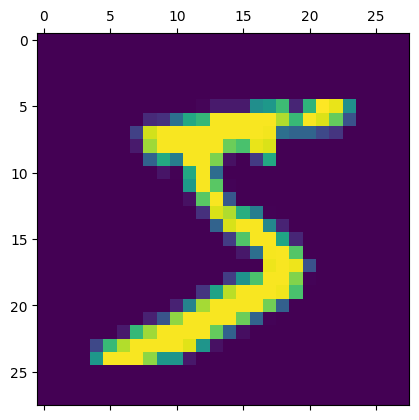

In [23]:
# len(X_train)
# X_train.shape
plt.matshow(X_train[0])

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [26]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4640 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3032 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9258


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.9249


[0.2681439220905304, 0.9248999953269958]

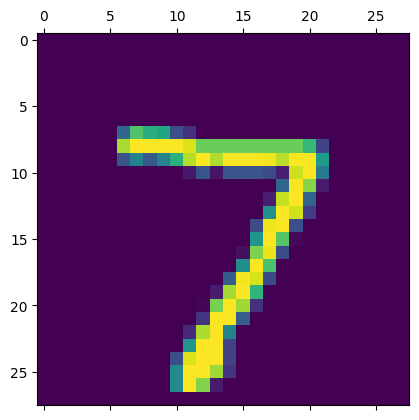

In [29]:
plt.matshow(X_test[0])

In [30]:
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [31]:
np.argmax(y_pred[0])

7

In [32]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    1,    0,    4,    6,    3,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,    7,  935,   15,    7,    1,   11,   10,   34,    5],
       [   4,    0,   23,  918,    0,   22,    2,   11,   18,   12],
       [   2,    1,    6,    1,  897,    0,   10,    4,   10,   51],
       [  11,    2,    6,   38,   10,  752,   17,    8,   40,    8],
       [  12,    3,    6,    1,    7,    8,  917,    2,    2,    0],
       [   1,    5,   24,    5,    6,    0,    0,  947,    2,   38],
       [   9,    8,    8,   18,    8,   21,   10,   11,  871,   10],
       [  10,    7,    2,    9,   15,    4,    0,   19,    7,  936]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

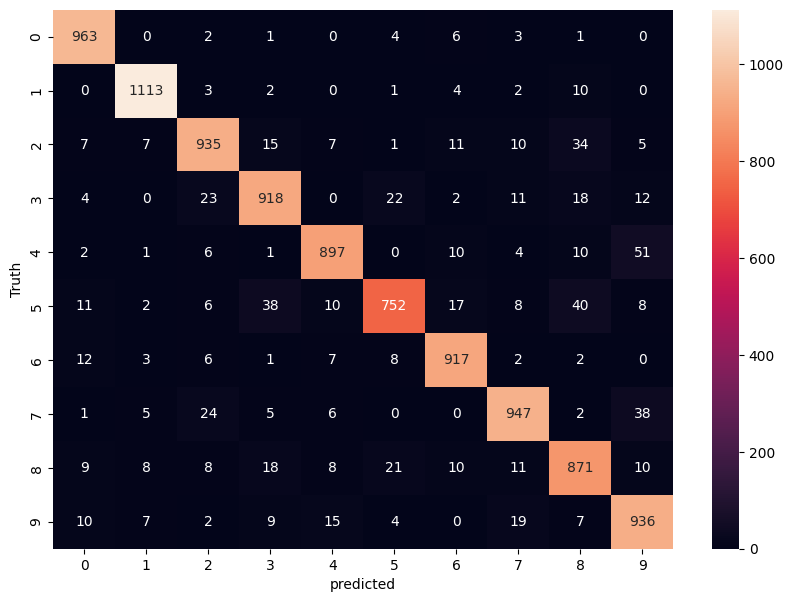

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='selu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)
# tensorboard --logdir logs/
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy','accuracy']
)
model.fit(X_train,y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2379 - sparse_categorical_accuracy: 0.9281 - accuracy: 0.9281
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1047 - sparse_categorical_accuracy: 0.9683 - accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9779 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0554 - sparse_categorical_accuracy: 0.9825 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9844 - accuracy: 0.9844


In [39]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

# or in terminal
# do 
# # tensorboard --logdir logs/

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 383424.